# Segmentation of oranges in RGB

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

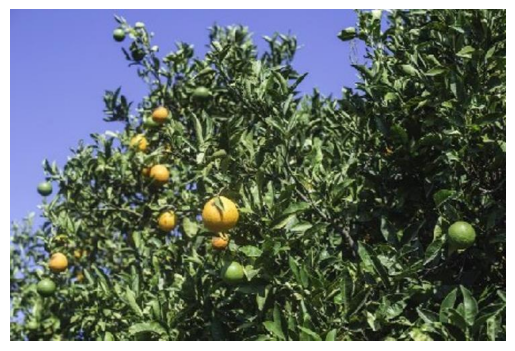

In [2]:
oranges = cv2.imread("./images/orangeTree.jpg")
oranges  = cv2.cvtColor(oranges, cv2.COLOR_BGR2RGB)

plt.imshow(oranges)
plt.axis('off')
plt.show()

Calculate the average of the red, green, and blue intensities in the sample color.

In [3]:
red, green, blue = cv2.split(oranges)
oranges_mask = np.loadtxt("./images/orangeMask.csv", delimiter=",", dtype=np.uint8).astype(bool)

red_ROI = red[oranges_mask]
green_ROI = green[oranges_mask]
blue_ROI = blue[oranges_mask]

mean_ROI = np.array([red_ROI.mean(), green_ROI.mean(), blue_ROI.mean()])

Calculate the distance of each pixel from the sample color. Since each color plane measures some type of chrominance, we need all three channels.

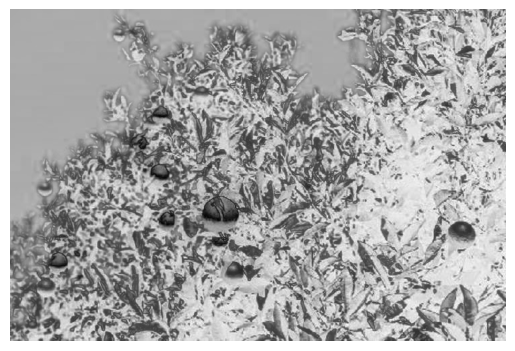

In [4]:
dist_oranges_RGB = np.sqrt((red - mean_ROI[0])**2 + (green - mean_ROI[1])**2 + (blue - mean_ROI[2])**2)

plt.imshow(dist_oranges_RGB, cmap='gray')
plt.axis('off')
plt.show()

Threshold the distance matrix and display the results.

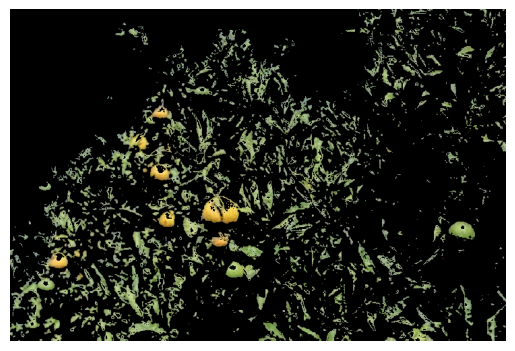

In [12]:
oranges_mask = (dist_oranges_RGB / dist_oranges_RGB.max()) < 0.4
oranges_masked = np.zeros_like(oranges)
for i in range(3):
    oranges_masked[:, :, i][oranges_mask == 1] = oranges[:, :, i][oranges_mask == 1]

plt.imshow(oranges_masked)
plt.axis('off')
plt.show()